# Polynomial Linear Regression

Suppose that we are doing multivariable linear regression. Our equations will equal to y = b0 + b1X1 + b2X2 + ... If the x1 and x2 was like this $x1 = x^2$, would the equation linear? It would not be linear right? Polynomial regression equation it self as you can see is not linear either, it has nth power of x, but when we say it is linear we are ment to say that its coeffienct are linearly related not x. If you are think about it, it is as same as multivariable regression's implimentation. In multi regression we can have features which has a column that can be another column's power of nth and we can still use multivariable linear regression on it. Because we only take care about the coefficient. x1, x2, x3 are can be related like $x1=x^{2}, x2=x^{3}$ it would not be a linear equation but it's coefficients are still can be linear related.

Polynomial linear regression is application of Multivariable regression.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

Our data set is small indeed so we won't split our data set into train and test sets.

## Training the Linear Regression model on the whole dataset

it is as same as we did it before.

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

We have said that Polynomial regression is application of Multivariable regression. Even it is true their implementation is differ. We want to impliment polynomial regression but our feature set is one dimentional. To get a set that fits the equation of $Y=X^0+X^1+X^2$, we will use PolynomialFeatures class. It will give us a array that its first row is equalts to 1 1 1, second is 1 2 4, thirt is 1 3 9 and so on. We will use it with LinearRegression class and we will have a equation like $Y=X^0+X^1+X^2$.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

## Visualising the Linear Regression results

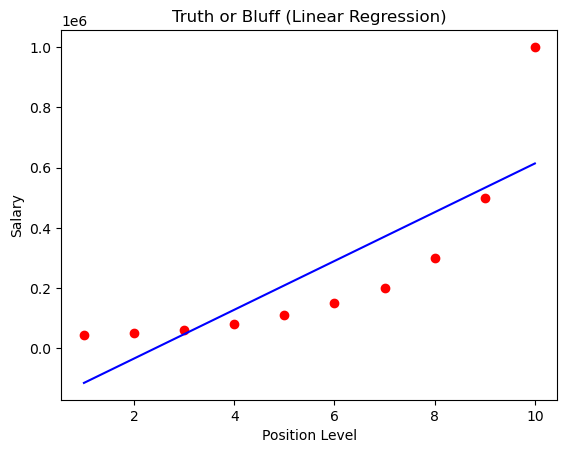

In [5]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

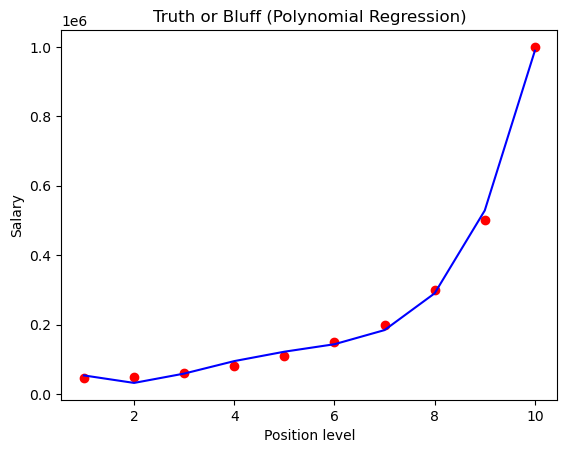

In [6]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

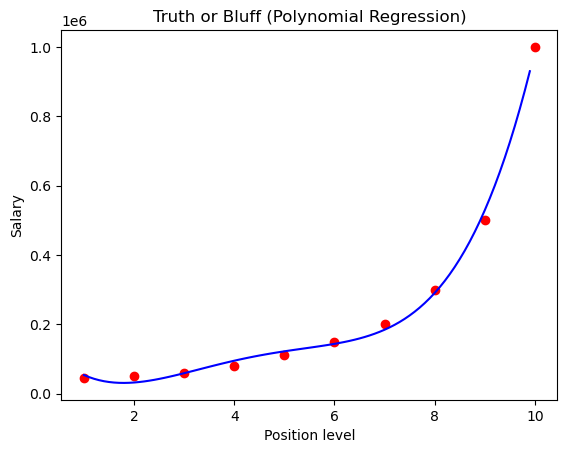

In [7]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

Be careful predict method takes only 2D arrays

In [8]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [9]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.4526516])

## Extra: Function to model polynomial regression with different degrees and calculating single predicts

In [10]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_regression(degree, x, y, single_or_not = "Multi", spred = [[]]):
    poly_reg = PolynomialFeatures(degree = degree)
    x_poly = poly_reg.fit_transform(x)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(x_poly, y)
    if (single_or_not != "Single"):
        plt.scatter(x, y, color = "red")
        plt.plot(x, lin_reg_2.predict(x_poly), color = "blue")
        plt.title("Truth or Bluff (Linear Regression)")
        plt.xlabel("Position Level")
        plt.ylabel("Salary")
        plt.show()
    else:
        print(lin_reg_2.predict(poly_reg.fit_transform(spred)))

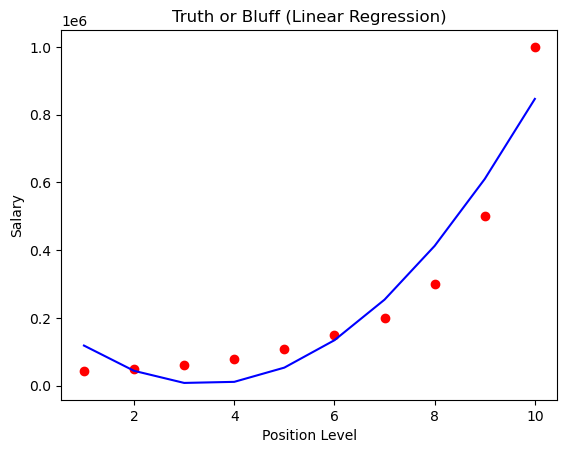

In [11]:
polynomial_regression(2, x, y)

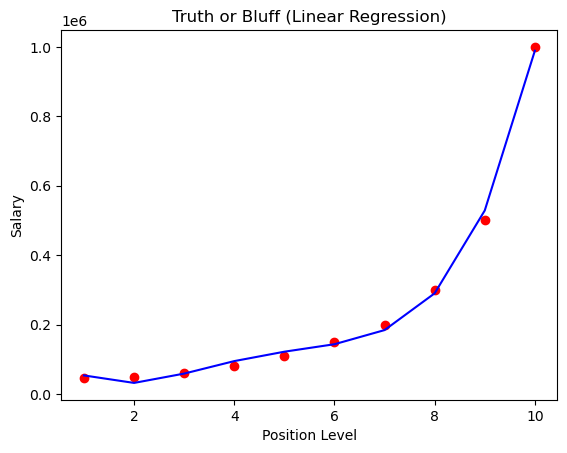

In [12]:
polynomial_regression(4, x, y)

In [14]:
polynomial_regression(4, x, y, "Single", [[6.5]])

[158862.4526516]
